<div style="border:solid black 2px; padding: 20px"><h1 style="color:black; margin-bottom:20px">Reviewer's comment v1</h1>
Halo Juliman !

Perkenalkan saya Dipta, disini saya akan mereview tugas Juliman ya.

Saya akan memberikan beberapa komen seperti dibawah ini, tolong jangan dipindah, dirubah, maupun dihapus ya.

Komen yang saya berikan akan muncul dalam warna hijau, kuning, atau pun merah seperti ini:

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

<div class="alert alert-warning">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Terdapat beberapa catatan.

</div>

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Perlu beberapa perbaikan

</div>

Dan tentu saja Juliman dapat menjawab saya dengan menggunakan ini

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Baik kak
</div>

# Analisa Pola Ride-Sharing pada Perusahaan Zuber 

## Deskripsi Proyek
Zuber adalah sebuah perusahaan berbagi tumpangan (*ride-sharing*) baru yang diluncurkan di Chicago. Tujuan proyek ini adalah menemukan pola pada informasi yang tersedia untuk mengetahui preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

Database yang tersedia digunakan menganalisis data dari kompetitor dan menguji hipotesis terkait pengaruh cuaca terhadap frekuensi perjalanan.

## Deskripsi Data

**1. Database**

Database memuat informasi perjalanan taksi di Chicago:

Tabel `neighborhoods`: data tentang wilayah di kota Chicago

- `name`: nama wilayah
- `neighborhood_id`: kode wilayah

Tabel `cabs`: data taksi

- `cab_id`: kode kendaraan
- `vehicle_id`: ID teknis kendaraan
- `company_name`: nama perusahaan yang memiliki kendaraan

Tabel `trips`: data perjalanan

- `trip_id`: kode perjalanan
- `cab_id`: kode kendaraan yang beroperasi
- `start_ts`: tanggal dan waktu perjalanan dimulai (waktu dibulatkan dalam satuan jam)
- `end_ts`: tanggal dan waktu perjalanan berakhir (waktu dibulatkan dalam satuan jam)
- `duration_seconds`: durasi perjalanan dalam satuan detik
- `distance_miles`: jarak perjalanan dalam satuan mil
- `pickup_location_id`: kode wilayah penjemputan
- `dropoff_location_id`: kode wilayah pengantaran

Tabel `weather_records`: data cuaca

- `record_id`: kode catatan cuaca
- `ts`: tanggal dan waktu saat pencatatan cuaca dilakukan (waktu dibulatkan dalam satuan jam)
- `temperature`: suhu saat pencatatan cuaca dilakukan
- `description`: deskripsi singkat tentang kondisi cuaca, seperti "light rain" (hujan ringan) atau "scattered clouds" (berawan).

**2. CSV Files**

`project_sql_result_01.csv`. *File* ini memuat data berikut:

- `company_name`: nama perusahaan taksi
- `trips_amount`: jumlah perjalanan untuk setiap perusahaan taksi pada tanggal 15-16 November 2017.

`project_sql_result_04.csv`. *File* ini memuat data berikut:

- `dropoff_location_name`: nama wilayah di Chicago tempat perjalanan berakhir
- `neighborhood`: jumlah rata-rata perjalanan yang berakhir di setiap wilayah pada bulan November 2017.

`project_sql_result_07.csv`. File ini memuat data perjalanan dari Loop ke Bandara Internasional O'Hare. Ingat, berikut adalah nilai kolom-kolom yang ada di tabel ini:
- `start_ts`: - tanggal dan waktu penjemputan
- `weather_conditions`: - kondisi cuaca saat perjalanan dimulai
- `duration_seconds`: - durasi perjalanan dalam satuan detik

# 1 Tujuan Proyek

Tujuan proyek ini adalah menemukan pola pada informasi yang tersedia untuk mengetahui preferensi penumpang dan dampak faktor eksternal terhadap perjalanan.

# 2 Hipotesis Proyek

Berikut ini adalah hipotesis yang akan diuji pada proyek ini:
> "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan."

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 3 Import Library


In [2]:
# Import semua library
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

!pip install pywaffle
from pywaffle import Waffle

import warnings
pd.set_option('display.max_column', 100)
warnings.filterwarnings('ignore')

# from google.colab import drive
# drive.mount('/content/drive')

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 4 Ikhtisar Data




## 4.1 Menampilkan Informasi Dataframe

In [6]:
# Load data ke dataframe
fleet = pd.read_csv('/datasets/project_sql_result_01.csv')
neighborhoods = pd.read_csv('/datasets/project_sql_result_04.csv')
loop = pd.read_csv('/datasets/project_sql_result_07.csv')

### 4.1.1 Armada ('fleet')

In [7]:
# Menampilkan sampel data
fleet.sample(10)

,company_name,trips_amount
40,6574 - Babylon Express Inc.,31
9,Blue Ribbon Taxi Association Inc.,5953
12,Dispatch Taxi Affiliation,3355
3,Yellow Cab,9888
43,2809 - 95474 C & D Cab Co Inc.,29
15,Checker Taxi Affiliation,2216
51,4623 - 27290 Jay Kim,15
47,4615 - 83503 Tyrone Henderson,21
18,24 Seven Taxi,1775
35,6742 - 83735 Tasha Ride Inc,39


In [8]:
# Menghitung baris dan kolom dataframe
fleet.shape

(64, 2)

In [9]:
# Menampilkan informasi data
fleet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [10]:
# Memeriksa nilai yang hilang
fleet.isna().sum()

company_name    0
trips_amount    0
dtype: int64

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

### 4.1.2 Wilayah ('neighborhoods')

In [11]:
# Menampilkan sampel data
neighborhoods.sample(10)

,dropoff_location_name,average_trips
9,Sheffield & DePaul,1259.766667
48,Austin,44.433333
46,Chinatown,52.433333
38,Armour Square,77.033333
58,Englewood,25.433333
34,Humboldt Park,97.866667
7,Museum Campus,1510.000000
53,Jackson Park,33.103448
84,West Pullman,6.466667
60,New City,22.933333


In [12]:
# Menghitung baris dan kolom dataframe
neighborhoods.shape

(94, 2)

In [13]:
# Menampilkan informasi data
neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [14]:
# Memeriksa nilai yang hilang
neighborhoods.isna().sum()

dropoff_location_name    0
average_trips            0
dtype: int64

Kesimpulan :
* Penamaan kolom sudah benar untuk semua dataframe.
* Tidak ada nilai yang hilang untuk semua dataframe.
* Untuk memudahkan analisis nilai pada kolom
 trips_amount dan average_trips diubah ke bentuk integer.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 4.2 Memeriksa Kolom Kategorik

In [15]:
# Memeriksa Nilai Unik pada kolom 'platform'
fleet['company_name'].unique()

array(['Flash Cab', 'Taxi Affiliation Services', 'Medallion Leasing',
       'Yellow Cab', 'Taxi Affiliation Service Yellow',
       'Chicago Carriage Cab Corp', 'City Service', 'Sun Taxi',
       'Star North Management LLC', 'Blue Ribbon Taxi Association Inc.',
       'Choice Taxi Association', 'Globe Taxi',
       'Dispatch Taxi Affiliation', 'Nova Taxi Affiliation Llc',
       'Patriot Taxi Dba Peace Taxi Association',
       'Checker Taxi Affiliation', 'Blue Diamond',
       'Chicago Medallion Management', '24 Seven Taxi',
       'Chicago Medallion Leasing INC', 'Checker Taxi', 'American United',
       'Chicago Independents', 'KOAM Taxi Association', 'Chicago Taxicab',
       'Top Cab Affiliation', 'Gold Coast Taxi',
       'Service Taxi Association', '5 Star Taxi', '303 Taxi',
       'Setare Inc', 'American United Taxi Affiliation', 'Leonard Cab Co',
       'Metro Jet Taxi A', 'Norshore Cab', '6742 - 83735 Tasha Ride Inc',
       '3591 - 63480 Chuks Cab', '1469 - 64126 Omar Jada'

In [16]:
# Menghitung jumlah nilai unik pada kolom company_name
len(fleet['company_name'].unique())

64

In [17]:
# Memeriksa Nilai Unik pada kolom 'genre'
neighborhoods['dropoff_location_name'].unique()

array(['Loop', 'River North', 'Streeterville', 'West Loop', "O'Hare",
       'Lake View', 'Grant Park', 'Museum Campus', 'Gold Coast',
       'Sheffield & DePaul', 'Lincoln Park', 'East Village',
       'Little Italy, UIC', 'Uptown', 'Near South Side', 'Garfield Ridge',
       'Logan Square', 'Edgewater', 'West Town', 'Old Town',
       'Rush & Division', 'North Center', 'Lincoln Square', 'Rogers Park',
       'West Ridge', 'Irving Park', 'Hyde Park', 'Avondale',
       'Wicker Park', 'Albany Park', 'United Center', 'Lower West Side',
       'Douglas', 'Portage Park', 'Humboldt Park', 'Norwood Park',
       'Kenwood', 'Bridgeport', 'Armour Square', 'Jefferson Park',
       'Bucktown', 'North Park', 'Garfield Park', 'Mckinley Park',
       'Belmont Cragin', 'Boystown', 'Chinatown', 'Grand Boulevard',
       'Austin', 'Sauganash,Forest Glen', 'South Shore', 'Woodlawn',
       'Little Village', 'Jackson Park', 'North Lawndale', 'Dunning',
       'Ukrainian Village', 'Hermosa', 'Englewood'

In [18]:
# Menghitung jumlah nilai unik pada kolom dropoff_location_name
len(neighborhoods['dropoff_location_name'].unique())

94

Dari pemeriksaan diatas, dapat ditarik kesimpulan
1. Jumlah nilai unik pada kedua kolom diatas sama dengan jumlah baris pada masing-masing dataframenya. 
2. Ada begitu banyak nilai untuk untuk kedua kolom diatas, sebaiknya diambil teknik khusus untuk menyederhanakan analisa.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 4.3 Memeriksa Kolom Numerik

In [19]:
# Memeriksa kolom numerik pada dataframe fleet
fleet.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [20]:
# Memeriksa kolom numerik pada dataframe neighborhoods
neighborhoods.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


Dari kedua tabel diatas, ditemukan bahwa:
* Banyak perjalanan pada kolom trips_amount ada di interval 2 sampai 19558, dengan perbedaan yang signifikan antara mean dan median (2145.48 dan 178.50). Dapat disimpulkan bahwa data ini bukan distribusi normal.
* Banyak perjalanan pada kolom average_trips ada di interval 1.8 sampai 10727.46, dengan perbedaan yang signifikan antara mean dan median (599.95 dan 178.50). Dapat disimpulkan bahwa data ini bukan distribusi normal.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 5 Pra-Pemrosesan Data

## 5.1 Memeriksa duplikat

In [21]:
# Memeriksa dulikat pada dataframe fleet
fleet.duplicated().sum()

0

In [22]:
# Memeriksa dulikat pada dataframe neighborhoods
neighborhoods.duplicated().sum()

0

Tidak ada nilai duplikat pada kedua dataframe ini

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 5.2 Mengubah tipe data

In [23]:
# Mengubah tipe data untuk kolom 'trips_amount'
fleet['trips_amount'] = fleet['trips_amount'].astype(int)

In [24]:
# Mengubah tipe data untuk kolom 'average_trips'
neighborhoods['average_trips'] = neighborhoods['average_trips'].astype(int)

Tipe data untuk kedua kolom sudah diubah.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 6 Analisis Data Eksploratif

Bagian ini menganalisis jumlah perjalanan pada setiap armada dan jumlah rata-rata perjalanan pada setiap wilayah di Chicago.

## 6.1 Banyak Perjalanan Armada Taxi

In [25]:
# Menampilkan armada taxi berdasarkan jumlah perjalanan taxi ('trips_amount')
fleet.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


Dari tabel diatas terlihat bahwa armada Flash Cab merupakan armada dengan jumlah perjalanan terbanyak diikuti oleh Taxi Affiliation Services dan Yellow Cab yang yang berturut-turut sebanyak 19588, 11422 dan 10367.

Agar informasi lebih mudah dianalisis berikut ini akan ditampilkan persentase banyak perjalanan dengan grafik waffle.

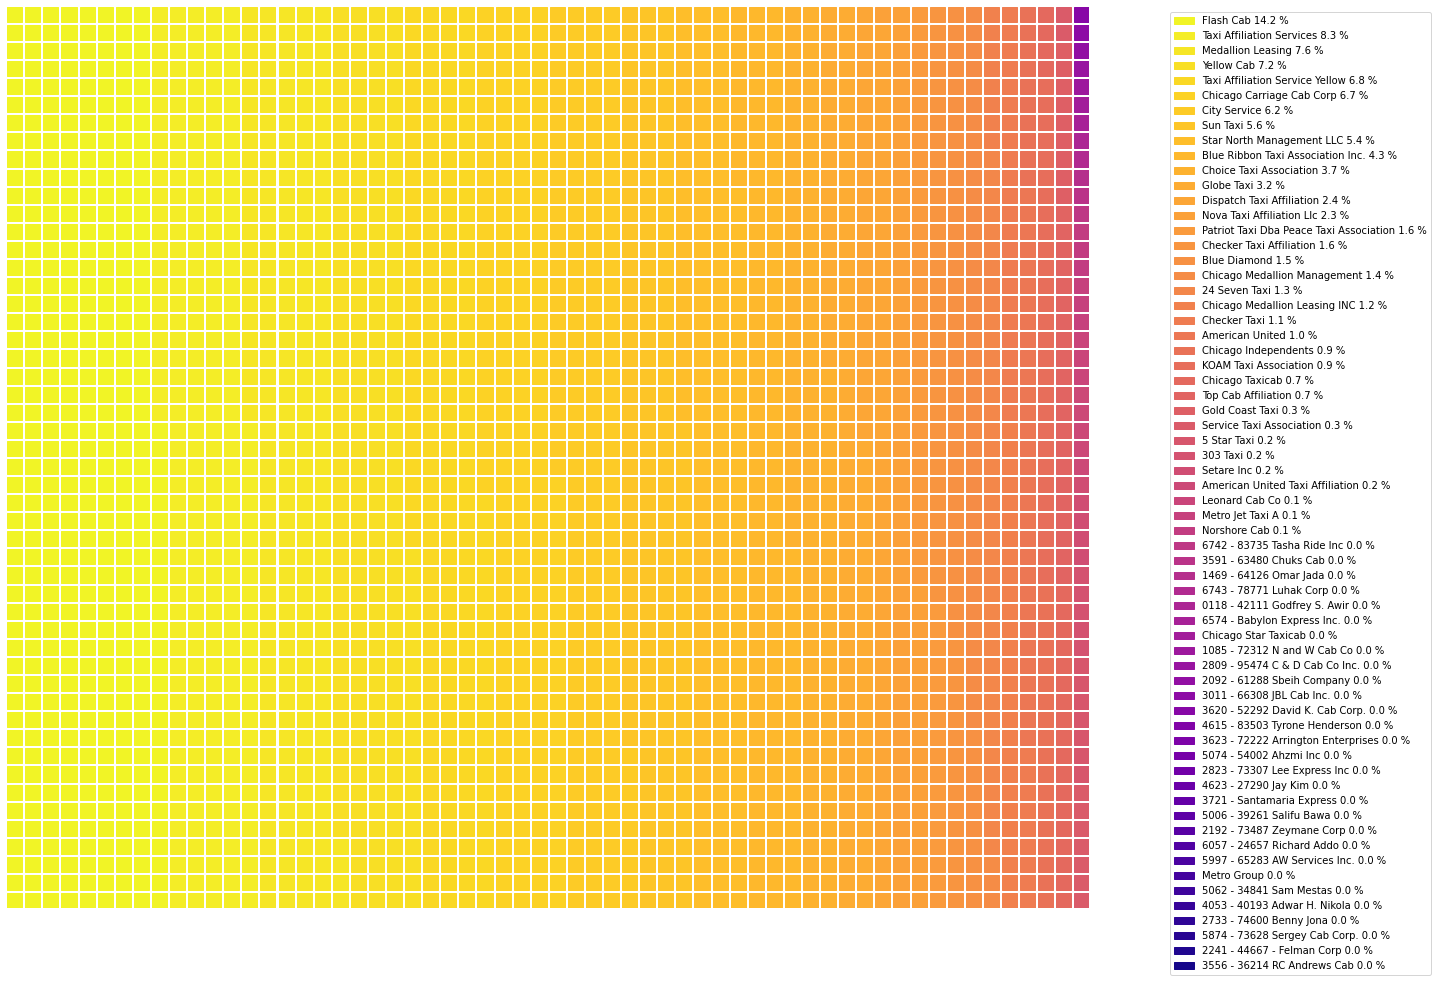

In [26]:
# Menampilkan grafik waffle untuk dataframe fleet
list_company = fleet['company_name'].tolist()

fleet['percent'] = round((fleet['trips_amount'] / fleet.trips_amount.sum())* 100, 2)

pal = list(sns.color_palette(palette='plasma_r',n_colors=len(list_company)).as_hex())

Label_per = [str(round(i*100/sum(fleet.trips_amount),1))+' %' for i in fleet.trips_amount]

fig = plt.figure(FigureClass=Waffle, 
                 rows=50, columns=60,
                 values=fleet.percent, 
                 colors=pal,
                 labels=[i+' '+j for i,j in zip(fleet.company_name, Label_per)],
                 figsize = (20,20),
                 legend={'loc':'upper right',
                         'bbox_to_anchor': (1.32, 1),
                        })
plt.tight_layout()
plt.show()

In [27]:
# Menghitung armada dengan perjalanan dibawah 1%
len(fleet[fleet['percent'] < 1])

42

Sesuai dengan data banyak perjalanan, persentase menujukan bahwa Flash Cab dengan urutan pertama diikuti oleh Taxi Affilation Services dan Medallion Leasin yang masing-masing 14.2%, 8.3%, dan 7.6%. Dan ada 42 armada yang hanya memiliki perjalanan kurang dari 1%.

Ada 64 armada taxi di kolom company_name. Flash Cab dan Taxi Affiliation Service merupakan armada yang paling populer. Untuk analisis, armada lain dikelompokan menjadi others

In [28]:
# Fungsi untuk menggabung armada dengan perjalanan kurang dari 100 kali
def other_companies(row):   
    trips_amount = row['trips_amount']
    company_name = row['company_name']
    if (company_name == 'Flash Cab') | (company_name == 'Taxi Affiliation Services'):
        return company_name
    return 'others' 

In [29]:
# Menjalankan fungsi di dataframe baru
fleet['company_name'] = fleet.apply(other_companies, axis=1)

In [30]:
# Memeriksa dataframe
fleet

,company_name,trips_amount,percent
0,Flash Cab,19558,14.24
1,Taxi Affiliation Services,11422,8.32
2,others,10367,7.55
3,others,9888,7.20
4,others,9299,6.77
...,...,...,...
59,others,7,0.01
60,others,7,0.01
61,others,5,0.00
62,others,3,0.00


Armada 'others' ada lebih dari 1 baris, karena penerapan fungsi sebelumnya. Untuk itu perlu dilakukan pivot untuk menggabungnya menjadi satu.

In [32]:
# Membuat tabel baru dengan pivot untuk menggabungkan value other companies
new_fleet = pd.pivot_table(fleet, index=['company_name'], values='trips_amount', aggfunc=['sum']).reset_index()
new_fleet = new_fleet.droplevel(axis=1, level=0)
new_fleet.columns = ['company_name', 'trips_amount']
new_fleet.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,others,106331


Sekarang terlihat bahwa hanya ada satu baris armada 'others'

In [33]:
# Mengurutkan dataframe berdasarkan kolom 'trips_amount'
new_fleet.sort_values(by=['trips_amount'], ascending= False, inplace=True, ignore_index= True)
new_fleet.tail(15)

,company_name,trips_amount
0,others,106331
1,Flash Cab,19558
2,Taxi Affiliation Services,11422


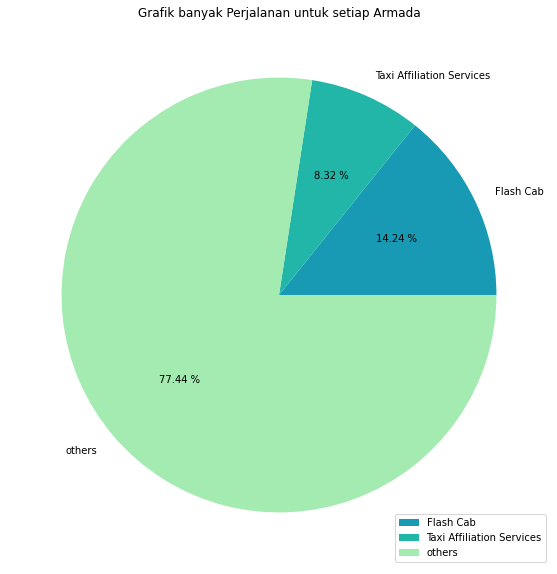

In [34]:
# Menampilkan grafik pie-chart
def trips_pct(pct):
    return "{:.2f} %".format(pct)
plt.figure(figsize=(10, 10))
colors = ['#189AB4', '#21B6A8', '#A3EBB1']
new_fleet.groupby('company_name')['trips_amount'].sum().plot.pie(colors=colors,autopct=trips_pct)
plt.title('Grafik banyak Perjalanan untuk setiap Armada')
plt.ylabel('')
plt.legend(loc='lower right')
plt.show()

Persentase jumlah perjalanan armada Flash Cab 14.24% dan Taxi Affiliation Service 8.32%. Selain itu ada 77.44% perjalanan oleh armada lain.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

## 6.2 Wilayah Tujuan Akhir 

Ada 94 wilayah tujuan akhir pada dataframe neighbourhoods. Untuk analisis akan diambil 10 terbesar berdasarkan banyaknya perjalanan ke wilayah tersebut.

In [35]:
# 10 Wilayah tujuan akhir dengan perjalanan terbanyak
new_neighborhoods = neighborhoods.nlargest(10, 'average_trips')
new_neighborhoods

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


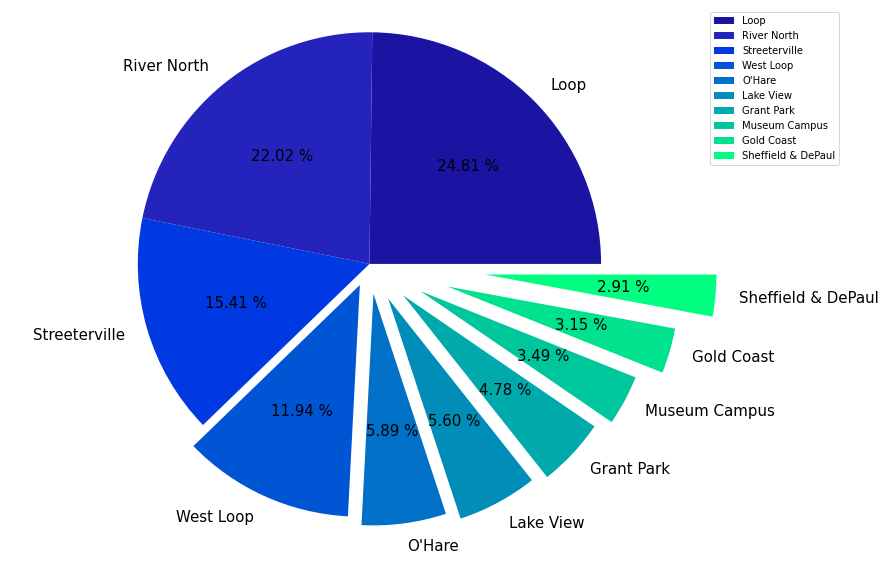

In [36]:
# Menampilkan persentase wilayah dengan perjalanan terbanyak
def show_pct(pct):
    return "{:.2f} %".format(pct)

re_index = new_neighborhoods.set_index('dropoff_location_name')

explode = (0, 0, 0, 0.1, 0.13, 0.17, 0.2, 0.25, 0.35, 0.5)
colors = ['#1B14A3', '#2424BC', '#0038E2', '#0055D4', '#0071C6', '#008DB8', '#00AAAA', '#00C69C', '#00E28E', '#00FF80', ]

re_index.plot(kind='pie', fontsize=15, colors=colors, explode=explode,autopct=show_pct, subplots=True, figsize=(15,10))
plt.axis('equal')
plt.ylabel('')
plt.legend(labels=re_index.index, loc="best")
plt.show()

Dari grafik diatas dapat diambil kesimpulan bahwa tiga besar perjalanan terbanyak ada di wilayah Loop 24.81%, River North 22.02%, Streeterville 15.41% dan sisanya sekitar 30% ada di Wilayah lain.

<div class="alert alert-success">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 7 Uji Hipotesis

Berikut ini adalah hipotesis yang akan diuji pada proyek ini:

> "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan."

maka hipotesis nolnya adalah:
> "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari Sabtu yang hujan."



```
# H0 : "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari Sabtu yang hujan."
# H1 : "Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan."
```



In [37]:
# Menampilkan sample dataframe
loop.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [38]:
# Menampilkan informasi dataframe
loop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


In [39]:
# Menampilkan kondisi cuaca
loop['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

In [40]:
# Membuat Dataframe dari dua kondisi cuaca
loop_good = loop[loop['weather_conditions'] == 'Good'].dropna()['duration_seconds']
loop_bad = loop[loop['weather_conditions']== 'Bad'].dropna()['duration_seconds']

In [41]:
# Memeriksa varians kedua dataset
print('varians loop_good adalah {}'.format(loop_good.var()))
print('varians loop_bad adalah {}'.format(loop_bad.var()))

varians loop_good adalah 576382.009689509
varians loop_bad adalah 520294.086002483


Varians kedua dataframe hampir sama, maka nilai equal_var adalah True

In [44]:
# Memeriksa hipotesis dengan st.ttest
alpha = 0.05 

results = st.ttest_ind(loop_good,loop_bad,equal_var=True)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("Hipotesis nol ditolak")
else:
    print("Hipotesis nol diterima")

p-value:  6.517970327099473e-12
Hipotesis nol ditolak


Dari hasil pengujian diatas ditemukan bahwa hipotesis nol ditolak yang berarti durasi perjalanan dipengaruhi oleh cuaca, maka hipotesis yang diterima adalah sebagai berikut: 
> **"Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan."**

<div class="alert alert-danger">
<b>Adipta's comment v.1</b> <a class="tocSkip"></a>

- kesimpulan kurang tepat, harusnya rata-rata perjalanan berubah/tidak sama
- H0 ditolak berarti kita menolak berikut:
    - `Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare sama pada hari Sabtu yang hujan`
- atau dengan kata lain kita menerima H1 dibawah:
    - `Durasi rata-rata perjalanan dari Loop ke Bandara Internasional O'Hare berubah pada hari Sabtu yang hujan.`

</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>
    
Halo Mas Dipta terimakasih untuk reviewnya, benar ada kesalahan dipenulisan hipotesis. Mohon direview kembali Mas.
</div>

<div class="alert alert-success">
<b>Adipta's comment v.2</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.

</div>

# 8 Kesimpulan

Berikut ini temuan dari hasil analisis Ride-Sharing pada perusahaan Zuber
1. Secara umum dataframe yang dianalisa memiliki data yang lengkap dan baik sehingga siap untuk dianalisis.
2. Untuk memudahkan analisis tipe data untuk kolom trips_amount dan average_trips diubah ke integer.
3. Ada begitu banyak value unik di kolom kategorik yang perlu dikelompokan atau difilter untuk analisis.
4. Pada kedua dataframe ditemukan bahwa kolom numerik memiliki mean dan median yang berbeda sehingga dapat disimpulkan data tersebut bukan distribusi normal.
5. Flash Cab merupakan armada dengan jumlah perjalanan terbanyak diikuti oleh Taxi Affiliation Services dan Yellow Cab yang yang berturut-turut sebanyak 14.2%, 8.3%, dan 7.6%. Dan ada 42 armada yang hanya memiliki perjalanan kurang dari 1%.
6. Wilayah yang menjadi tujuan akhir perjalanan terbesar a di wilayah Loop 24.81%, yang diikuti oleh River North 22.02%, Streeterville 15.41% dan sisanya sekitar 30% ada di Wilayah lain.
7. Dari hasil pengujian hipotesis, durasi atau lama perjalanan dipengaruhi cuaca.

Dengan demikian dapat diambil kesimpulan umum bahwa **Loop** merupakan wilayah yang paling sering dituju dengan hampir 1/4 perjalanan berhenti disini dan armada yang paling populer adalah **Flash Cab** yang hampir 15% menguasai pasar di bisnis ini serta cuaca yang mempengaruhi lama perjalanan.

<div class="alert alert-block alert-warning">

# General comments #1
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Good Job Juliman! Sebagian besar kamu telah menyelesaikan project ini dengan baik namun masih ada beberapa hal yang bisa diimprove yang saya tandai dengan comment berwarna kuning dan merah. Jika kamu telah merevisinya, projectmu akan di approve dan kamu bisa lanjut ke tahapan selanjutnya!.
    

</div>

<div class="alert alert-block alert-success">

# General comments #2
<b>Reviewer's comment</b> <a class="tocSkip"></a> 

Revisi sudah sesuai yah!
    

</div>